In [1]:
from agent import LinearKalmanSRTD
from environment import SimpleMDP, TransitionRevaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dynamic_programming import value_iteration
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from itertools import product
#%matplotlib notebook

/home/jesse/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


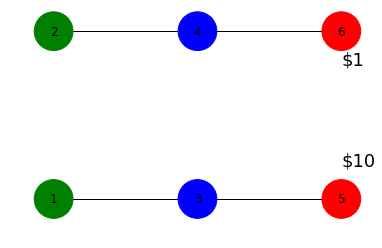

In [2]:
fig, ax = plt.subplots()
ag = LinearKalmanSRTD(environment=TransitionRevaluation())
ax.annotate(xy=(2,.2),s='$10', fontsize=18)
ax.annotate(xy=(2,.8),s='$1', fontsize=18)
ag.env.show_graph()

# Learn initial task

In [3]:
for ep in range(20):
    _ = ag.train_one_episode()

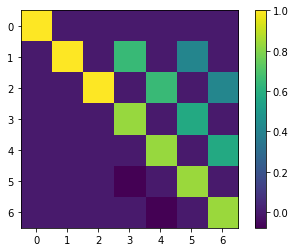

In [4]:
plt.figure()
plt.imshow(ag.M.reshape(ag.env.nr_states, ag.env.nr_states))
plt.colorbar()

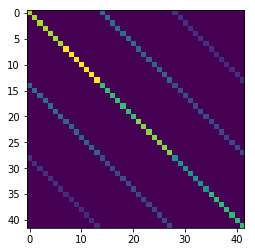

In [5]:
plt.figure()
plt.imshow(ag.covariance[ag.env.nr_states:, ag.env.nr_states:])

In [6]:
M_after_initial_training = ag.M.copy()

In [7]:
ag.w

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       9.00891972, 0.91742362])

In [8]:
# what does the agent choose? 
value = M_after_initial_training.reshape(7,7) @ ag.w

value[1], value[2]

(3.7265530009712773, 0.3824818049204163)

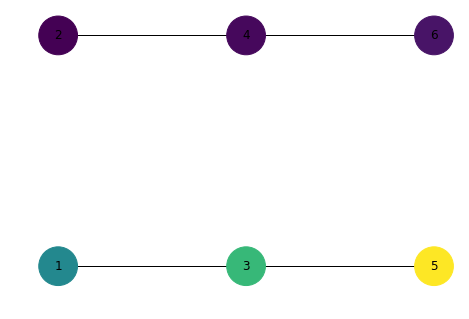

In [9]:
categories = pd.Categorical(value[1:])
node_color = categories

ag.env.show_graph(color_map=node_color)

In [10]:
# Model correctly chooses state 1

chosen_state = np.argmax([value[1], value[2]]) + 1

chosen_state 

1

# Revaluate transitions

In [11]:
ag.env.set_relearning_phase()  # Changes the transition structure

Text(2, 0.8, '$1')

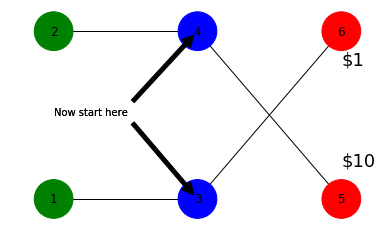

In [12]:
fig, ax = plt.subplots()
ag.env.show_graph()

ax.annotate('Now start here', xy=(1, 1), xytext=(0,.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.annotate('Now start here', xy=(1, 0), xytext=(0,.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

ax.annotate(xy=(2,.2),s='$10', fontsize=18)
ax.annotate(xy=(2,.8),s='$1', fontsize=18)


In [31]:
for i in range(400):
    ag.train_one_episode()

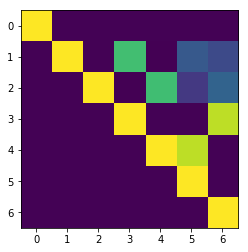

In [32]:
plt.figure()
plt.imshow(ag.M.reshape(7,7))

In [33]:
# 1- 6 is nonzero
ag.M.reshape(7,7)[1,6]

0.22002679343699974

In [34]:
# 2-5 is nonzero
ag.M.reshape(7,7)[2,5]

0.16310630192128528

In [35]:
# after initial training it was zero 
M_after_initial_training.reshape(7,7)[2,5]

0.0

In [36]:
ag.w

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       9.98968636, 0.99885138])

In [37]:
# Choose after second phase

M_after_phase_2 = ag.M.copy()

value = M_after_phase_2.reshape(7,7) @ ag.w

value[1], value[2]

(2.9897954991777356, 1.945549016854174)

In [38]:
value

array([0.        , 2.9897955 , 1.94554902, 0.89896624, 8.99071773,
       9.98968636, 0.99885138])

In [39]:
np.around(M_after_phase_2.reshape(7,7), decimals=3)

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.698, -0.005,  0.277,  0.22 ],
       [ 0.   ,  0.   ,  1.   , -0.004,  0.69 ,  0.163,  0.317],
       [ 0.   ,  0.   ,  0.   ,  1.   , -0.   , -0.   ,  0.9  ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.9  ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.   ,  1.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , -0.   ,  0.   ,  0.   ,  1.   ]])

In [22]:
np.around(M_after_initial_training.reshape(7,7), decimals=3)

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  1.   ,  0.   ,  0.65 ,  0.   ,  0.414,  0.   ],
       [ 0.   ,  0.   ,  1.   ,  0.   ,  0.654,  0.   ,  0.417],
       [ 0.   ,  0.   ,  0.   ,  0.833,  0.   ,  0.575,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.832,  0.   ,  0.579],
       [ 0.   ,  0.   ,  0.   , -0.077,  0.   ,  0.836,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.078,  0.   ,  0.836]])

In [23]:
m_labels = ['M{}-{}'.format(i, j) for i, j in product(list(range(ag.env.nr_states)), list(range(ag.env.nr_states)))]

In [24]:
m_labels

['M0-0',
 'M0-1',
 'M0-2',
 'M0-3',
 'M0-4',
 'M0-5',
 'M0-6',
 'M1-0',
 'M1-1',
 'M1-2',
 'M1-3',
 'M1-4',
 'M1-5',
 'M1-6',
 'M2-0',
 'M2-1',
 'M2-2',
 'M2-3',
 'M2-4',
 'M2-5',
 'M2-6',
 'M3-0',
 'M3-1',
 'M3-2',
 'M3-3',
 'M3-4',
 'M3-5',
 'M3-6',
 'M4-0',
 'M4-1',
 'M4-2',
 'M4-3',
 'M4-4',
 'M4-5',
 'M4-6',
 'M5-0',
 'M5-1',
 'M5-2',
 'M5-3',
 'M5-4',
 'M5-5',
 'M5-6',
 'M6-0',
 'M6-1',
 'M6-2',
 'M6-3',
 'M6-4',
 'M6-5',
 'M6-6']